In [12]:
import numpy as np

In [13]:
R=np.matrix([
 
 [-1,-1,-1,-1,0,-1],
 [-1,-1,-1,0,-1,100],
 [-1,-1,-1,0,-1,-1],
 [-1,0,0,-1,0,-1],
 [-1,0,0,-1,-1,100],
 [-1,0,-1,-1,0,100]
])
R

matrix([[ -1,  -1,  -1,  -1,   0,  -1],
        [ -1,  -1,  -1,   0,  -1, 100],
        [ -1,  -1,  -1,   0,  -1,  -1],
        [ -1,   0,   0,  -1,   0,  -1],
        [ -1,   0,   0,  -1,  -1, 100],
        [ -1,   0,  -1,  -1,   0, 100]])

# Construct the zero matrix of the size of R matrix to form the Q matrix

In [14]:
Q=np.matrix(np.zeros([6,6]))
print(Q)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


# Define gamma value - Learning Parameter

In [15]:
gamma=0.8

# Q- Learning:
Q(state,action)= R(state,action) + gamma * Max(Q(next state,all actions))

In [18]:
initial_state=1

In [19]:
def available_actions(state):
    current_state_row=R[state,]
    av_act=np.where(current_state_row>=0)[1]
    return av_act

In [20]:
available_act=available_actions(initial_state)
print(available_act)

[3 5]


In [21]:
#Define the sample next action function


def sample_next_action(available_actions_range):
    next_action=int(np.random.choice(available_act,1))
    return next_action


In [22]:
action=sample_next_action(available_act)
print(action)

5


# Q Matrix - update function

In [23]:
def update(current_state,action,gamma):
 
    #Max(Q(next state,all actions))
    max_index=np.where(Q[action,]==np.max(Q[action,]))[1] 
 
    if max_index.shape[0]>1:
        max_index=int(np.random.choice(max_index,size=1))
 
    else:
        max_index=int(max_index)
    max_value=Q[action,max_index]
 
    Q[current_state,action]=R[current_state,action]+gamma*max_value

In [24]:
update(initial_state,action,gamma)

# Train the agent with this environment information

In [25]:
for i in range(10000000):
    current_state=np.random.randint(0,int(Q.shape[0]))
    action=sample_next_action(available_act)
    update(current_state,action,gamma)

# Testing
goal_state=5

In [27]:
current_state=4
steps=[current_state]
while current_state!=5:
    next_step_index=np.where(Q[current_state,]==np.max(Q[current_state,]))[1]
    if next_step_index.shape[0]>1:
        next_step_index=int(np.random.choice(next_step_index,size=1))
    else:
        next_step_index=int(next_step_index)
    steps.append(next_step_index)
    current_state=next_step_index

print('Optimum path from initial state {} to the goal state is {}'.format(initial_state, steps))


Optimum path from initial state 1 to the goal state is [4, 5]


In [29]:
!pip install gym

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
     - -------------------------------------- 20.5/721.7 kB ? eta -:--:--
     - -------------------------------------- 20.5/721.7 kB ? eta -:--:--
     - -------------------------------------- 20.5/721.7 kB ? eta -:--:--
     - -------------------------------------- 20.5/721.7 kB ? eta -:--:--
     - -------------------------------------- 20.5/721.7 kB ? eta -:--:--
     - -------------------------------------- 20.5/721.7 kB ? eta -:--:--
     - -------------------------------------- 20.5/721.7 kB ? eta -:--:--
     - -------------------------------------- 20.5/721.7 kB ? eta -:--:--
     - -------------------------------------- 20.5/721.7 kB ? eta -:--:--
     - -------------------------------------- 20.5/721.7 kB ? eta -:--:--
     - -------------------------------------- 20.5/721.7 kB ? eta -:--:--
     ---- -------------------------------- 92.2/721.7 

In [30]:
#10.2
import gym

env = gym.make('MountainCar-v0')
observation = env.reset()

for t in range(10):
    env.render()
    print(observation)
    action = env.action_space.sample()
    step_output = env.step(action)

    if isinstance(step_output, tuple) and len(step_output) > 4:
        observation, reward, done, info, *_ = step_output
    else:
        observation, reward, done, info = step_output

    print(observation, reward, done, info)
    if done:
        print('Finished after {} timesteps'.format(t + 1))
        break

(array([-0.5024441,  0.       ], dtype=float32), {})
[-5.0260264e-01 -1.5855371e-04] -1.0 False False
[-5.0260264e-01 -1.5855371e-04]
[-0.50191855  0.00068408] -1.0 False False
[-0.50191855  0.00068408]
[-5.0239694e-01 -4.7840766e-04] -1.0 False False
[-5.0239694e-01 -4.7840766e-04]
[-5.0203431e-01  3.6268597e-04] -1.0 False False
[-5.0203431e-01  3.6268597e-04]
[-0.5008332   0.00120107] -1.0 False False
[-0.5008332   0.00120107]
[-5.0080276e-01  3.0456044e-05] -1.0 False False
[-5.0080276e-01  3.0456044e-05]
[-5.0094312e-01 -1.4038084e-04] -1.0 False False
[-5.0094312e-01 -1.4038084e-04]
[-0.5002533   0.00068983] -1.0 False False
[-0.5002533   0.00068983]
[-0.49973843  0.00051488] -1.0 False False
[-0.49973843  0.00051488]
[-0.49840233  0.00133608] -1.0 False False


C:\Users\SIRISHA\anaconda3\Lib\site-packages\gym\envs\classic_control\mountain_car.py:171: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("MountainCar-v0", render_mode="rgb_array")
  gym.logger.warn(
C:\Users\SIRISHA\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [31]:
#10.3
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# goal
GOAL = 100
# all states, including state 0 and state 100
STATES = np.arange(GOAL + 1)
# probability of head
HEAD_PROB = 0.4

In [33]:
def run_policy():
    # State value
    state_value = np.zeros(GOAL + 1)
    state_value[GOAL] = 1.0
    sweeps_history = []

    # Value iteration
    while True:
        old_state_value = state_value.copy()
        sweeps_history.append(old_state_value)

        for state in STATES[1:GOAL]:
            # Get possible actions for the current state
            actions = np.arange(min(state, GOAL - state) + 1)
            action_returns = []

            for action in actions:
                action_returns.append(
                    HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action]
                )

            new_value = np.max(action_returns)
            state_value[state] = new_value

        delta = abs(state_value - old_state_value).max()
        if delta < 1e-9:
            sweeps_history.append(state_value)
            break

    # Compute the optimal policy
    policy = np.zeros(GOAL + 1)

    for state in STATES[1:GOAL]:
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []

        for action in actions:
            action_returns.append(
                HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action]
            )

        policy[state] = actions[np.argmax(np.round(action_returns, 5))]

    plt.figure(figsize=(10, 20))
    plt.subplot(2, 1, 1)

    for sweep, state_value in enumerate(sweeps_history):
        plt.plot(state_value, label='sweep {}'.format(sweep))

    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')

    plt.subplot(2, 1, 2)
    plt.scatter(STATES, policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.show()


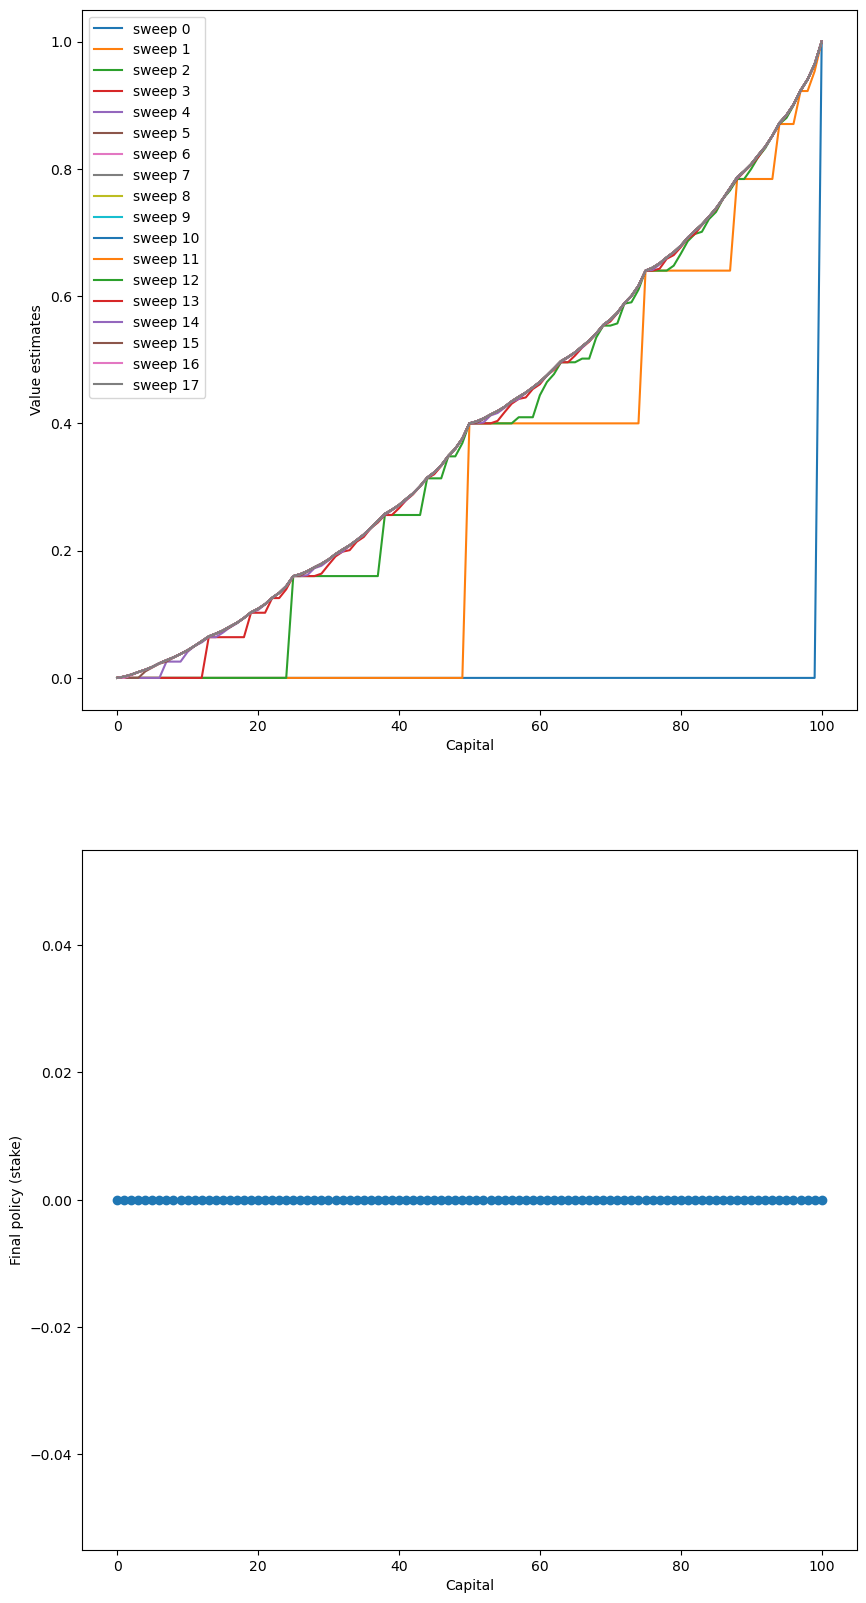

In [34]:
run_policy()

In [35]:
#10.4
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

In [36]:
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9
# left, up, right, down
ACTIONS = [np.array([0, -1]),
 np.array([-1, 0]),
 np.array([0, 1]),
 np.array([1, 0])]
ACTIONS_FIGS=[ '←', '↑', '→', '↓']
ACTION_PROB = 0.25


In [37]:
def step(state, action):
    if state == A_POS:
        return A_PRIME_POS, 10
    if state == B_POS:
        return B_PRIME_POS, 5
    next_state = (np.array(state) + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

In [38]:
def draw_image(image): 
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])
    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows
    # Add cells
    for (i, j), val in np.ndenumerate(image):
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        if [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        if [i, j] == B_POS:
            val = str(val) + " (B)"
        if [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor='white')
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')
    ax.add_table(tb)

In [39]:
def draw_policy(optimal_values):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])
 
    nrows, ncols = optimal_values.shape
    width, height = 1.0 / ncols, 1.0 / nrows
 
    # Add cells
    for (i, j), val in np.ndenumerate(optimal_values):
        next_vals=[]
        for action in ACTIONS:
            next_state, _ = step([i, j], action)
            next_vals.append(optimal_values[next_state[0],next_state[1]])
 
        best_actions=np.where(next_vals == np.max(next_vals))[0]
        val=''
        for ba in best_actions:
            val+=ACTIONS_FIGS[ba]
 
        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        if [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        if [i, j] == B_POS:
            val = str(val) + " (B)"
        if [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
 
        tb.add_cell(i, j, width, height, text=val,
                loc='center', facecolor='white')
 
    # Row and column labels...
    for i in range(len(optimal_values)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                   edgecolor='none', facecolor='none')
 
    ax.add_table(tb)

In [40]:
def random_policy():
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keep iteration until convergence
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                for action in ACTIONS:
                    ( next_i, next_j), reward = step([i, j], action)
                    # bellman equation
                    new_value[i, j] += ACTION_PROB * (reward + DISCOUNT *value[next_i, next_j])
        if np.sum(np.abs(value - new_value)) < 1e-4:
            draw_image(np.round(new_value, decimals=2))
            plt.show()
            break
        value = new_value

In [41]:
def optimal_policy():
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keep iteration until convergence
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                values = []
                for action in ACTIONS:
                    ( next_i, next_j), reward = step([i, j], action)

                    # value iteration
                    values.append(reward + DISCOUNT * value[next_i, next_j])
                new_value[i, j] = np.max(values)
        if np.sum(np.abs(new_value - value)) < 1e-4:
            draw_image(np.round(new_value, decimals=2))
            plt.show()
            draw_policy(new_value)
            plt.show()
            break
        value = new_value

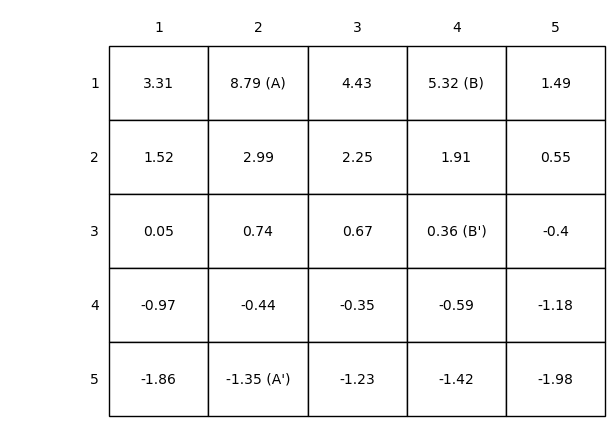

In [42]:
random_policy()

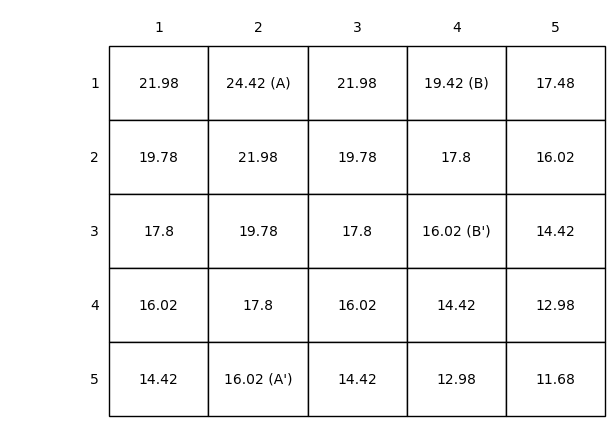

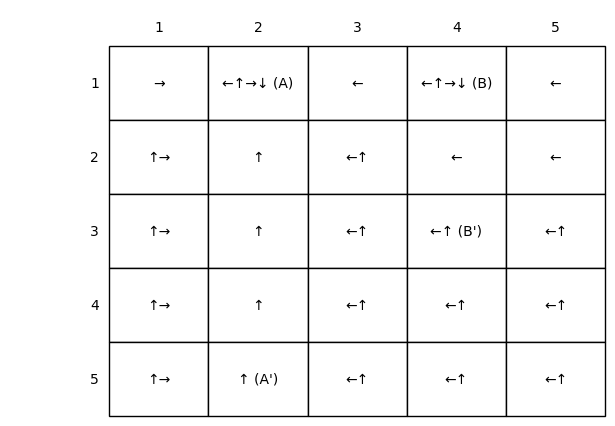

In [43]:
optimal_policy()

# Gambler’s Problem from Sutton's book.

In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../") 

In [3]:
#Implement value iteration for the gambler’s problem and solve it for p_h = 0.25 and p_h = 0.55.
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    # The reward is zero on all transitions except those on which the gambler reaches his goal,
    # when it is +1.
    rewards = np.zeros(101)
    rewards[100] = 1 
    
    # We introduce two dummy states corresponding to termination with capital of 0 and 100
    V = np.zeros(101)
    
    def one_step_lookahead(s, V, rewards):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state. 
            rewards: The reward vector.
                        
        Returns:
            A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        A = np.zeros(101)
        stakes = range(1, min(s, 100-s)+1) # Your minimum bet is 1, maximum bet is min(s, 100-s).
        for a in stakes:
            # rewards[s+a], rewards[s-a] are immediate rewards.
            # V[s+a], V[s-a] are values of the next states.
            # This is the core of the Bellman equation: The expected value of your action is 
            # the sum of immediate rewards and the value of the next state.
            A[a] = p_h * (rewards[s+a] + V[s+a]*discount_factor) + (1-p_h) * (rewards[s-a] + V[s-a]*discount_factor)
        return A
    
    while True:
        # Stopping condition
        delta = 0
        # Update each state...
        for s in range(1, 100):
            # Do a one-step lookahead to find the best action
            A = one_step_lookahead(s, V, rewards)
            # print(s,A,V) # if you want to debug.
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far
            delta = max(delta, np.abs(best_action_value - V[s]))
            # Update the value function. Ref: Sutton book eq. 4.10. 
            V[s] = best_action_value        
        # Check if we can stop 
        if delta < theta:
            break
    
    # Create a deterministic policy using the optimal value function
    policy = np.zeros(100)
    for s in range(1, 100):
        # One step lookahead to find the best action for this state
        A = one_step_lookahead(s, V, rewards)
        best_action = np.argmax(A)
        # Always take the best action
        policy[s] = best_action
    
    return policy, V

In [4]:
policy, v = value_iteration_for_gamblers(0.25)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 15. 16. 17.
 18.  6. 20. 21.  3. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 11. 10.  9. 42.  7. 44.  5. 46. 47. 48. 49. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 10.  9. 17.  7. 19.  5. 21.
 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]

Optimized Value Function:
[0.00000000e+00 7.24792480e-05 2.89916992e-04 6.95257448e-04
 1.16010383e-03 1.76906586e-03 2.78102979e-03 4.03504074e-03
 4.66214120e-03 5.59997559e-03 7.08471239e-03 9.03964043e-03
 1.11241192e-02 1.56793594e-02 1.61464431e-02 1.69517994e-02
 1.86512806e-02 1.98249817e-02 2.24047303e-02 2.73845196e-02
 2.83388495e-02 3.04937363e-02 3.61633897e-02 3.84953022e-02
 4.44964767e-02 6.25000000e-02 6.27174377e-02 6.33700779e-02
 6.45857723e-02 6.59966059e-02 6.78135343e-02 7.08430894e-02
 7.46098323e-02 7.64884604e-02 7.93035477e-02 8.37541372e-02

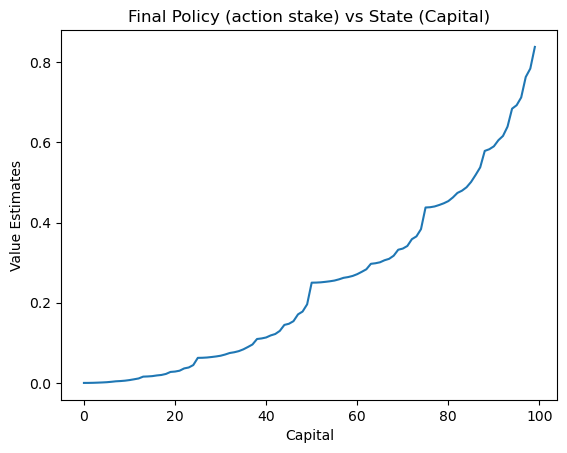

In [5]:
# Plotting Final Policy (action stake) vs State (Capital)

# x axis values
x = range(100)
# corresponding y axis values
y = v[:100]
 
# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Value Estimates')
 
# giving a title to the graph
plt.title('Final Policy (action stake) vs State (Capital)')
 
# function to show the plot
plt.show()

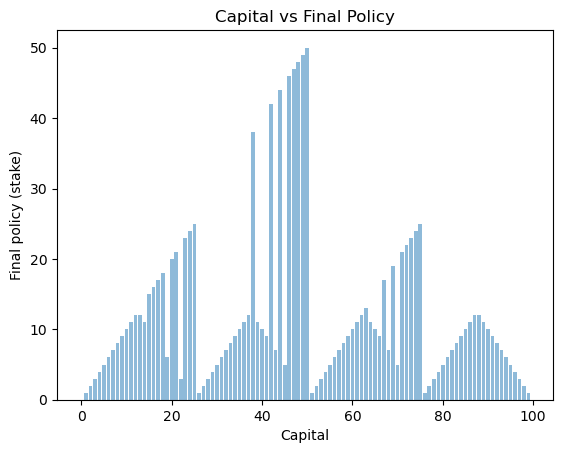

In [6]:
# Plotting Capital vs Final Policy

# x axis values
x = range(100)
# corresponding y axis values
y = policy
 
# plotting the bars
plt.bar(x, y, align='center', alpha=0.5)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Final policy (stake)')
 
# giving a title to the graph
plt.title('Capital vs Final Policy')
 
# function to show the plot
plt.show()